In [ ]:
#11.1 Cross-Validating Models

# Load libraries
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load digits dataset
digits = datasets.load_digits()

# Create features matrix
features = digits.data

# Create target vector
target = digits.target

# Create standardizer
standardizer = StandardScaler()

# Create logistic regression object
logit = LogisticRegression()

# Create a pipeline that standardizes, then runs logistic regression
pipline = make_pipeline(standardizer, logit)

# Create k-fold cross-validation
kf =  KFold(n_splits=5, # 5 sections
             shuffle=True,
               random_state=0)

# Conduct k-fold cross-validation
cv_results = cross_val_score(pipline,
                             features,
                             target,
                             cv=kf,
                             scoring='accuracy',
                             n_jobs=-1  # all of them
                             )

# Calculate mean
cv_results.mean()

np.float64(0.9677329000309502)

In [2]:
# View score for all 5 folds
cv_results

array([0.96111111, 0.95833333, 0.97771588, 0.96935933, 0.97214485])

In [3]:
# Import library
from sklearn.model_selection import train_test_split

# Create training and test sets
features_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)

# Fit standardizer to training set
standardizer.fit(features_train)

# Apply to both training and test sets which can then be used to train models
features_train_std = standardizer.transform(features_train)
feature_test_std = standardizer.transform(feature_test)

In [ ]:
#11.2 Creating a Baseline Regression Model

# Load libraries
from sklearn.datasets import load_wine
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

# Load data
wine = load_wine()

# Create features
features, target = wine.data, wine.target

# Make test and training split
features_train, feature_test, target_train, target_test = train_test_split(
    features, target, random_state=0
)

# Create a dummy regressor
dummy = DummyRegressor(strategy='mean')
# Predict mean of y_train
# A simple model as baseline

# "Train" dummy regressor
dummy.fit(features_train, target_train)

# Get R-squared score
dummy.score(feature_test, target_test)

-0.0480213580840978

In [6]:
# Load library
from sklearn.linear_model import LinearRegression

# Train simple linear regression model
ols = LinearRegression()
ols.fit(features_train, target_train)

# Get R-squared score
ols.score(feature_test, target_test)

0.804353263176954

In [7]:
# Create dummy regressor that predicts 1s for everything
clf = DummyRegressor(strategy='constant', constant=1)
clf.fit(features_train, target_train)

# Evaluate score
clf.score(feature_test, target_test)

-0.06299212598425186

In [8]:
#11.3 Creating a Baseline Classification Model

# Load libraries
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

# Load data
iris = load_iris()

# Create target vector and feature matrix
features, target = iris.data, iris.target

# Split into training and test set
features_train, feature_test, target_train, target_test = train_test_split(
    features, target, random_state=0
)

# Create dummy classifier
dummy = DummyClassifier(strategy='uniform', random_state=1)

# "Train" model
dummy.fit(features_train, target_train)

# Get accuracy score
dummy.score(feature_test, target_test)


0.42105263157894735

In [9]:
# Load library
from sklearn.ensemble import RandomForestClassifier

# Create classifier
classifier = RandomForestClassifier()

# Train model
classifier.fit(features_train, target_train)

# Get accuracy score
classifier.score(feature_test, target_test)

0.9736842105263158

In [ ]:
#11.4 Evaluating Binary Classifier Predictions

# Load libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate features matrix and target vector
x, y = make_classification(n_samples=10000,
                           n_features=3,
                           n_informative=3, # The number of usefull features
                           n_redundant=0, # This means all features are independent and useful
                           n_classes=2, # Binary classification
                           random_state=1)

# Create logistic regression
logit = LogisticRegression()

# Cross-validate model using accuracy
cross_val_score(logit, x, y, scoring='accuracy')


array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

In [11]:
# Cross-validate model using precision
cross_val_score(logit, x, y, scoring='precision')

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

In [12]:
# Cross-validate model using recall
cross_val_score(logit, x, y, scoring='recall')

array([0.951, 0.952, 0.953, 0.949, 0.951])

In [13]:
# Cross-validate model using F1
cross_val_score(logit, x, y, scoring='f1')

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

In [14]:
# Load libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create training and test split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=1)

# Predict values for training target vector
y_hat = logit.fit(x_train, y_train).predict(x_test)

# Calculate accuracy
accuracy_score(y_test, y_hat)

0.947

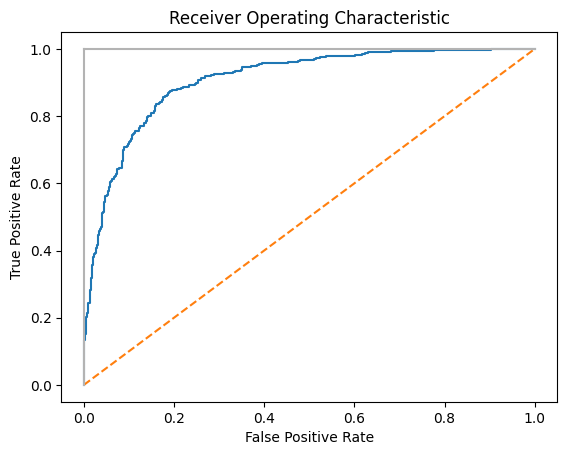

In [16]:
#11.5 Evaluating Binary Classifier Thresholds

# Load libraries
import matplotlib.pyplot as plt
from sklearn.datasets import  make_classification
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# Create feature matrix and target vector
features, target = make_classification(n_samples=10000,
                                       n_features=10,
                                       n_classes=2,
                                       n_informative=3,
                                       random_state=3)

# Split into training and test sets
features_train, feature_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=1
)

# Create classifier
logit = LogisticRegression()

# Train model
logit.fit(features_train, target_train)

# Get predicted probabilities
target_probabillities = logit.predict_proba(feature_test)[:, 1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(
    target_test,
    target_probabillities
)

# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls = "--")
plt.plot([0, 0], [1, 0], c = '.7'), plt.plot([1, 1], c='.7')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [17]:
# Get predicted probabilities
logit.predict_proba(feature_test)[0:1]

array([[0.8689235, 0.1310765]])

In [18]:
logit.classes_

array([0, 1])

In [20]:
print("Threshold:", threshold[124])
print("True Positive Rate:", true_positive_rate[124])
print("False Positive Rate:", false_positive_rate[124])

Threshold: 0.4981509475208573
True Positive Rate: 0.8367346938775511
False Positive Rate: 0.1627450980392157


In [22]:
print("Threshold:", threshold[49])
print("True Positive Rate:", true_positive_rate[49])
print("False Positive Rate:", false_positive_rate[49])

Threshold: 0.8058635463651345
True Positive Rate: 0.5653061224489796
False Positive Rate: 0.052941176470588235


In [21]:
# Calculate area under curve
roc_auc_score(target_test, target_probabillities)

0.9073429371748699

In [24]:
#11.6 Evaluating Multiclass Classifier Predictions

# Load libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate features matrix and target vector
features, target = make_classification(n_samples=10000,
                                       n_features=3,
                                       n_informative=3,
                                       n_redundant=0,
                                       n_classes=3,
                                       random_state=1)

# Create logistic regression
logit = LogisticRegression()

# Cross-validate model using accuracy
cross_val_score(logit, features, target, scoring='accuracy')


array([0.8405, 0.829 , 0.827 , 0.8155, 0.8205])

In [26]:
# Cross-validate model using macro averaged F1 score
cross_val_score(logit, features, target, scoring='f1_macro')

array([0.84012014, 0.82895312, 0.82675308, 0.81515121, 0.82042629])